<b><h2>We are given with dataset of 10,000 visitors to a Web Page,</h2><br>
<ul><li>
<i><h4>Which contains information about the ads they clicked at each visit<br>
(amongst 10 ads). Our Task is to find the most viewed ad i.e ad having<br> 
the highest distribution of the viewers in Minimum number of Rounds <br>
and Resources. </h3></li> </ul>

<i># Here I have used Reinforcement Learning Models like "Upper Confidence Bound" & "Thompson Sampling" <br>
&nbsp;&nbsp;     Model to find the ad having the highest distribution in minimum number of rounds.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

<h2><b>Loading dataset

In [3]:
df=pd.read_csv("Ads_CTR_optimisation.csv")
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


<i>No Missing Value

In [4]:
df.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<h1><b><i>Reinforcement Learning Models :

<h2>1. Upper Confidence Bound

In [16]:
N=1000
d=10
ads_selected=[]
number_of_selection=[0]*d
sum_of_rewards=[0]*d
total_reward=0
import math
for round in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if(number_of_selection[i]>0):
            avg_reward=sum_of_rewards[i]/number_of_selection[i]
            delta_i=math.sqrt(3/2*math.log(round+1)/number_of_selection[i])
            upper_bound=avg_reward+delta_i
        else:
            upper_bound=1e400
        if(upper_bound>max_upper_bound):
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    number_of_selection[ad]=number_of_selection[ad]+1
    sum_of_rewards[ad]=sum_of_rewards[ad]+df.values[round,ad]
    total_reward=total_reward+df.values[round,ad]

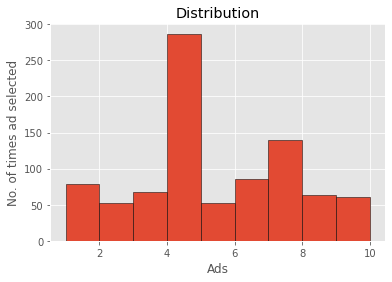

In [30]:
plt.style.use("ggplot")
binsl=range(1,11)
plt.hist(ads_selected,bins=binsl,edgecolor="black")
plt.title("Distribution")
plt.xlabel("Ads")
plt.ylabel("No. of times ad selected")
plt.show()

<i>UCB was able to predict the Distribution of most viewed ad in 1000 samples i.e with 1:10 of the Data available.

<h2>2. Thompson Sampling

In [18]:
N=500
d=10
number_of_reward_1=[0]*d
number_of_reward_2=[0]*d
ads_selected_q=[]
import random
for round in range(0,N):
    ad=0
    max_random=0
    for i in range(0,d):
        random_beta=random.betavariate(number_of_reward_1[i]+1,number_of_reward_2[i]+1)
        if(random_beta>max_random):
            max_random=random_beta
            ad=i
    ads_selected_q.append(ad)
    reward=df.values[round,ad]
    if(reward==1):
        number_of_reward_1[ad]=number_of_reward_1[ad]+1
    else:
        number_of_reward_2[ad]=number_of_reward_2[ad]+1
    total_reward=total_reward+reward

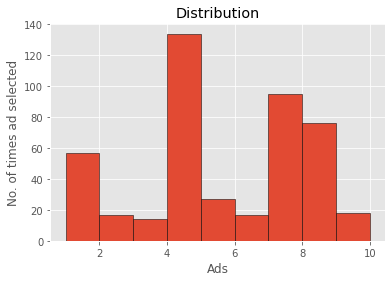

In [34]:
plt.hist(ads_selected_q,bins=binsl,edgecolor="black")
plt.title("Distribution")
plt.xlabel("Ads")
plt.ylabel("No. of times ad selected")
plt.show()

<i>THOMPSON SAMPLING was able to find the distribution of the most viewed ad within 500 iteration of the dataset i.e with  1:20 Portion of dataset.

"# Thus Thompson Model was able to predict the distribution in minimum number of iterations w.r.t UCB"<br>
<h4><b>And it was found that, Ad "4" needs to be displayed the most, as it has the highest chance to be clicked by the viewer.